In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def low_rank_approximation(A_matrix,k=2):
    
    u_matrix, d_matrix, v_matrix = np.linalg.svd(A_matrix, full_matrices=1)
    A_k_matrix = np.zeros((len(u_matrix), len(v_matrix)))
    
    for i in range(k):
        A_k_matrix += d_matrix[i] * np.outer((u_matrix.T)[i], v_matrix[i])

    return A_k_matrix

In [72]:
dataset = pd.read_csv('ml-latest-small/ratings.csv')


In [73]:
dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [74]:
df = dataset.drop(columns=['timestamp'])
data = df.to_numpy()[:100,:]
X = data
y = dataset.drop(columns=['timestamp','userId','movieId']).to_numpy()[:100,:]
X_train,X_test,y_train,y_test = train_test_split(data,y,random_state=42,test_size=0.2)
# here y is just dummy just so that it would help us in spliting

In [75]:
X_train.shape


(80, 3)

In [76]:
X_test.shape

(20, 3)

In [77]:
max(np.int64(data[:,0])),max(np.int64(data[:,1])),X_train[0][0],X_train[0][1],max(X_test[:,0]),max(X_test[:,1])

(1, 1552, 1.0, 1031.0, 1.0, 1298.0)

In [78]:
matrix_for_training = np.zeros([1552,1552])

In [79]:
for i in X_train:
    matrix_for_training[np.int64(i[0])-1][np.int64(i[1])-1] = i[2]

In [80]:
def calculate_error(test,k):
    pred = low_rank_approximation(matrix_for_training,k)
    err = 0
    for i, j, S_i_j in test:
        err += (S_i_j - pred[int(i-1)][int(j-1)])**2
    return err    

In [ ]:
error_k = []
indices = []
for i in range(1,101):
    error = calculate_error(X_test,i)
    error_k.append(error)
    indices.append(i)

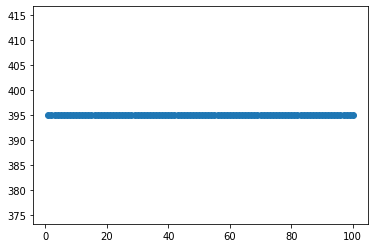

In [65]:
plt.scatter(indices,error_k)